In [2]:
from utils import *
import gensim
from sklearn.mixture import BayesianGaussianMixture
import json

In [6]:
df = pd.read_csv("assets/finalproduct/finalproductDf")
df.drop(["Unnamed: 0"],axis=1, inplace=True)
id_to_auth = pickle_o.load("assets/dictionaries/id_to_all_auths_2004")
auth_to_id = pickle_o.load("assets/dictionaries/auths_to_all_id_2004")

In [15]:
Name = list(df.Author.values)
kth_id = [auth_to_id[a] for a in Name]
df_only_auth = pd.DataFrame(data={"Name":Name, "ID":kth_id})
df_only_auth.to_csv("assets/finalproduct/onlyAuthors.csv")

In [10]:
df_abs = pd.read_csv("assets/dataframes/all_authors_df_2004")
df_abs.drop(["Unnamed: 0"],axis=1, inplace=True)

In [16]:
df_abs.head()

,Abstracts,Doc_id,KTH_name,KTH_id,KTH_name_id,department,school
0,A model for the enhanced water dissociation th...,65923903,"Dahlkild, Anders A.:Behm, Marten",u16fm297:u13dx9f6,NaN,Mekanik,Skolan för teknikvetenskap (SCI)
1,Wood from white spruce Picea glauca that had ...,40520967,"Zhang, Liming:Henriksson, Gunnar",u16k1pmb:u1lkf75c,NaN,Fiber- och polymerteknologi,"Skolan för kemi, bioteknologi och hälsa (CBH)"
2,"We consider the moduli space H-g,H-n of n-poin...",41290309,"Bergstrom, Jonas",u1mv0zlg,NaN,Matematik (Inst.),Skolan för teknikvetenskap (SCI)
3,In this paper a day-ahead planning algorithm f...,40129874,"Matevosyan, Julija:Olsson, Magnus:Soder, Lennart",u16u3erw:u1naf2f4:u1fjok0u,NaN,Elkraftteknik,Skolan för elektroteknik och datavetenskap (EECS)
4,"In this letter, we develop a fixed-point arith...",61385618,"Johansson, Christopher:Lansner, Anders B.",u1s42xk3:u12s8cr8,NaN,Beräkningsvetenskap och beräkningsteknik (CST),Skolan för elektroteknik och datavetenskap (EECS)


In [12]:
df.head()

,Author,Doc_id,Department
0,"Lundqvist, Mikael",48300032:42766782:61947542,Beräkningsvetenskap och beräkningsteknik (CST)
1,"Herman, Pawel Andrzej",48300032:479:1093:85126921:68940495:75150162:8...,Beräkningsvetenskap och beräkningsteknik (CST)
2,"Lansner, Anders B.",48300032:84386234:59204327:1352:59565690:74114...,Beräkningsvetenskap och beräkningsteknik (CST)
3,"Shafagh, Reza Z.",87154693:77035398,Mikro- och nanosystemteknik
4,"Guo, Weijin",87154693,Mikro- och nanosystemteknik


In [54]:
list_of_dict = list()
for a, d in zip(df.Author.values, df.Doc_id.values):
    new_d = dict()
    new_d["name"] = str(a)
    
    abstracts = list()
    all_d = d.split(":")
    new_d["docid"] = all_d
    for ad in all_d:
        abst = df_abs[df_abs.Doc_id == int(ad)].Abstracts.values[0]
        abstracts.append(abst)
    new_d["abstracts"] = abstracts
    list_of_dict.append(new_d)
    

In [55]:
list_of_dict[0]

{'name': 'Lundqvist, Mikael',
 'docid': ['48300032', '42766782', '61947542'],
 'abstracts': ['Spontaneous oscillations measured by local field potentials, electroencephalograms and magnetoencephalograms exhibit a pronounced peak in the alpha band (8-12 Hz) in humans and primates. Both instantaneous power and phase of these ongoing oscillations have commonly been observed to correlate with psychophysical performance in stimulus detection tasks. We use a novel model-based approach to study the effect of prestimulus oscillations on detection rate. A previously developed biophysically detailed attractor network exhibits spontaneous oscillations in the alpha range before a stimulus is presented and transiently switches to gamma-like oscillations on successful detection. We demonstrate that both phase and power of the ongoing alpha oscillations modulate the probability of such state transitions. The power can either positively or negatively correlate with the detection rate, in agreement wit

In [56]:
with open('assets/finalproduct/auth_to_abs.json', 'w') as fp:
    json.dump(list_of_dict, fp)

In [31]:
y = json.dumps(auth_to_abs)

# the result is a Python dictionary:
print(y)

{"Lundqvist, Mikael": ["Spontaneous oscillations measured by local field potentials, electroencephalograms and magnetoencephalograms exhibit a pronounced peak in the alpha band (8-12 Hz) in humans and primates. Both instantaneous power and phase of these ongoing oscillations have commonly been observed to correlate with psychophysical performance in stimulus detection tasks. We use a novel model-based approach to study the effect of prestimulus oscillations on detection rate. A previously developed biophysically detailed attractor network exhibits spontaneous oscillations in the alpha range before a stimulus is presented and transiently switches to gamma-like oscillations on successful detection. We demonstrate that both phase and power of the ongoing alpha oscillations modulate the probability of such state transitions. The power can either positively or negatively correlate with the detection rate, in agreement with experimental findings, depending on the underlying neural mechanism 

In [48]:
author = df.Author.values
list_of_author= list()
for i, a in enumerate(author):
    a_dict = dict()
    a_dict["id"]= i
    a_dict["name"]= a
    list_of_author.append(a_dict)


In [51]:
with open('assets/finalproduct/list_of_author.json', 'w') as fp:
    json.dump(list_of_author, fp)

In [111]:
nan_ix = [isinstance(i,float) for i in df.Department.values]
df.Department[nan_ix] = "NaN"
department = list(set(df.Department.values))

In [112]:
department = [make_name_noAscii(d) for d in department]

In [114]:
department_to_auth= list()
for i, d in enumerate(department):
    author = list(df[df.Department == d].Author.values)
    a_dict = dict()
    a_dict["department"]= d
    a_dict["name"]= author
    department_to_auth.append(a_dict)

In [115]:
with open('assets/finalproduct/department_to_auth.json', 'w') as fp:
    json.dump(department_to_auth, fp)

In [116]:
dep_list = list()
for i, d in enumerate(department):
    a_dict = dict()
    a_dict["id"]= i
    a_dict["department"]= d
    dep_list.append(a_dict)

In [117]:
with open('assets/finalproduct/departments.json', 'w') as fp:
    json.dump(dep_list, fp)

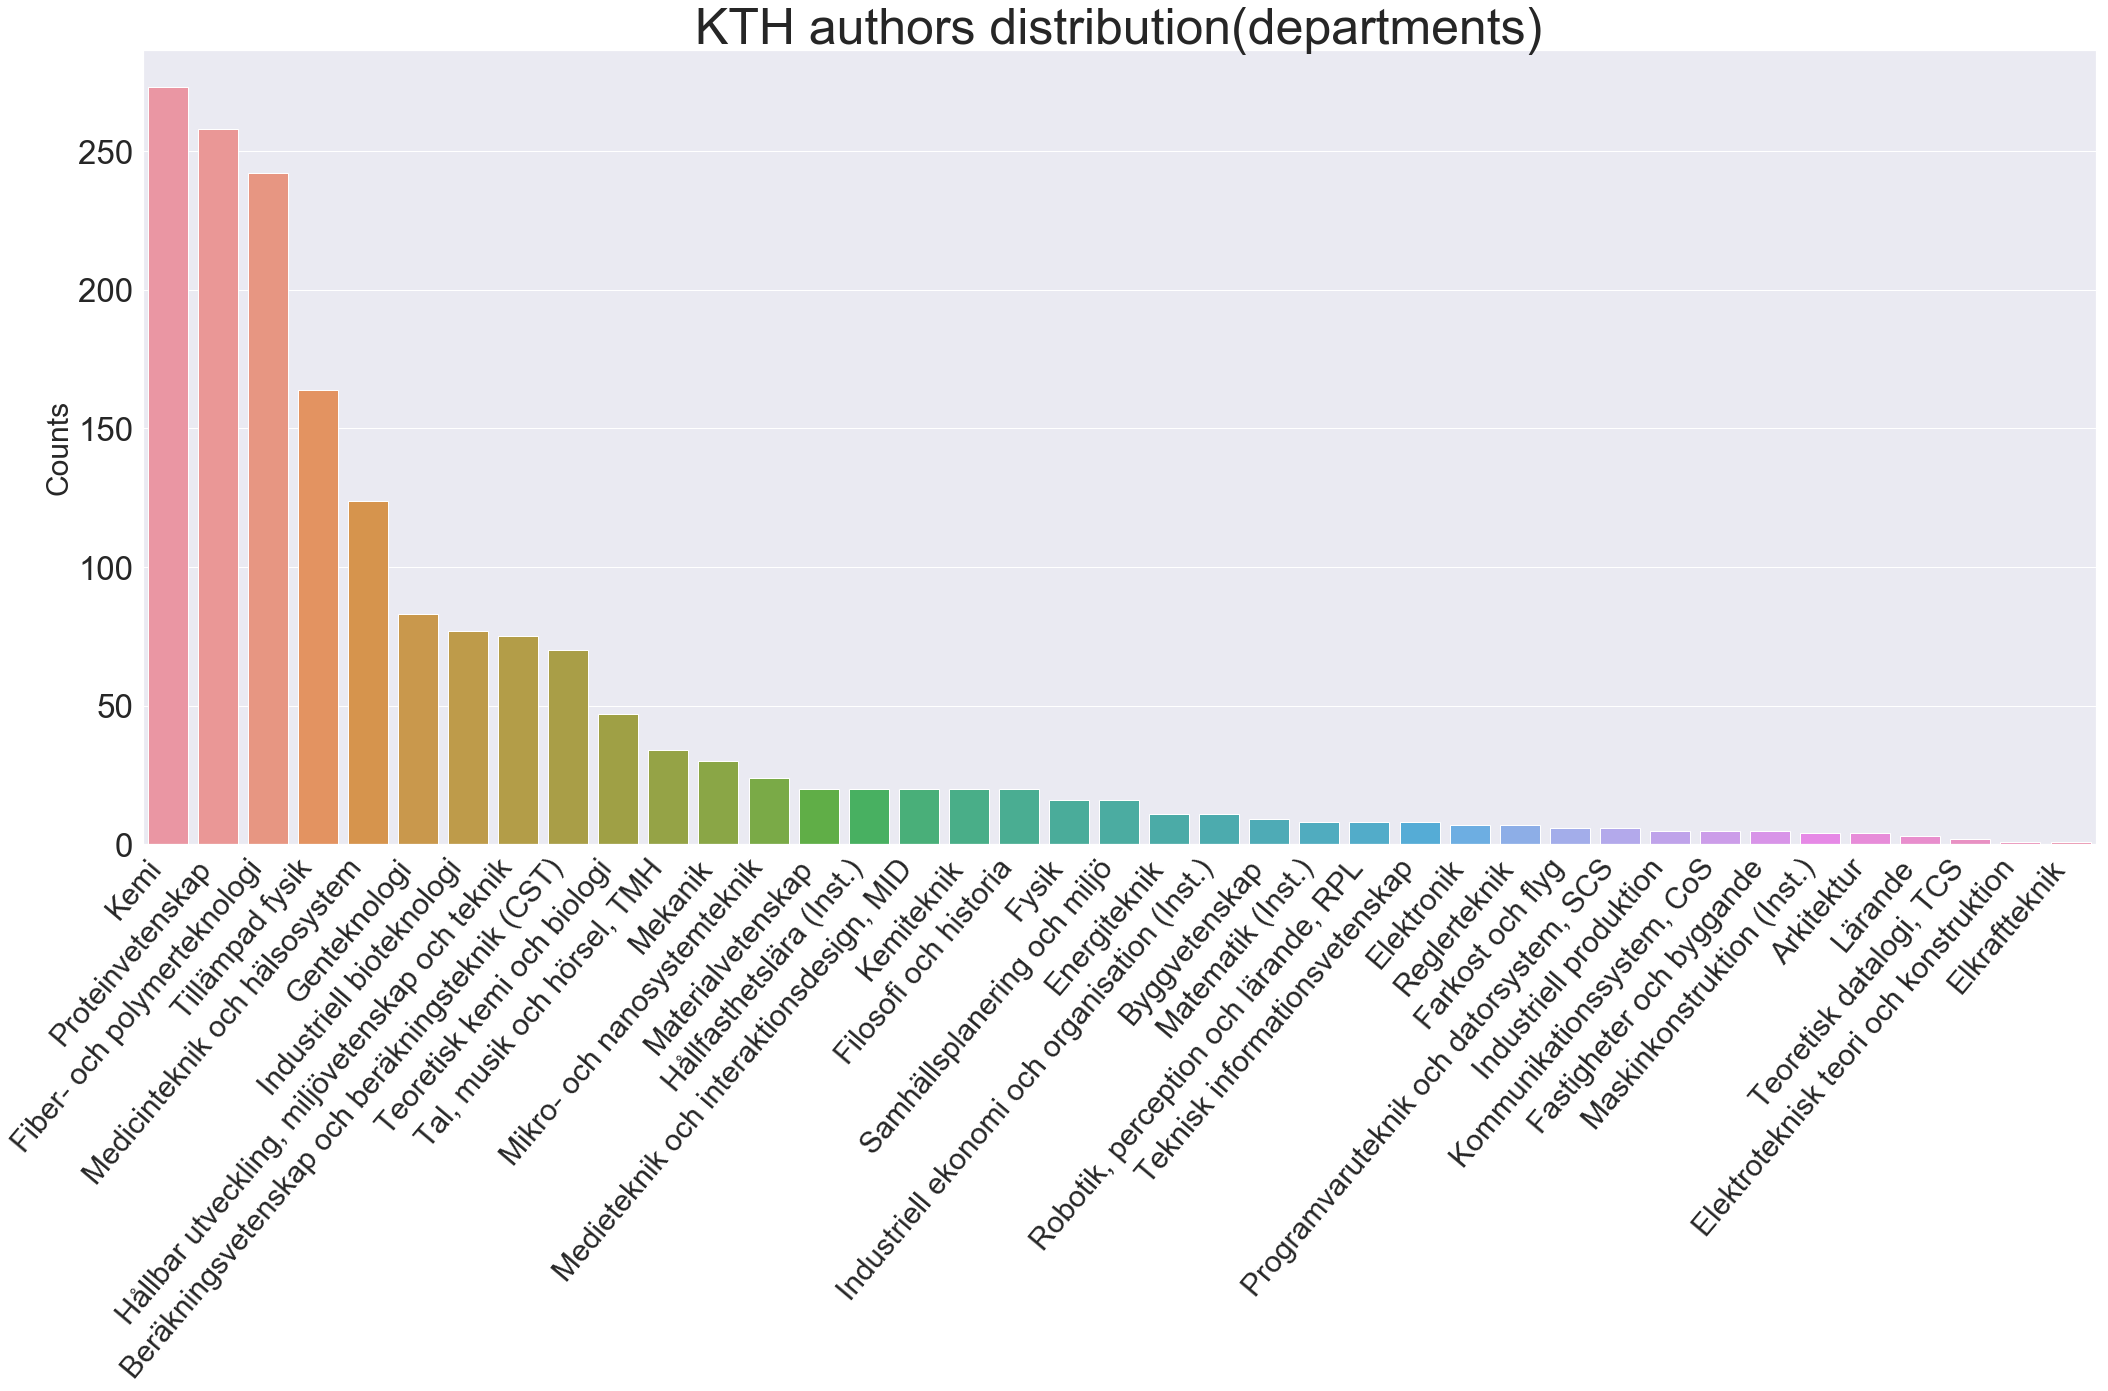

In [38]:
kth_school_s = pd.Series(np.array(df.Department)).value_counts().sort_values(ascending=False)
plt.figure(figsize=(35,23))
ax = sns.barplot(kth_school_s.index,kth_school_s.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=30)
ax.set_title("KTH authors distribution(departments)",fontsize=50)

ax.set_ylabel("Counts",fontsize=30)
sns.set(font_scale=3)
plt.gcf().subplots_adjust(bottom=0.40)
#plt.show()
plt.savefig("assets/figures/articleDepartmentFinal")

In [124]:
len(kth_school_s.index)

39

In [125]:
39 - 5

34

In [122]:
kth_school_s.values.sum()

1744

In [126]:
1744 - 884

860